In [1]:
%matplotlib inline


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class AutoEncodeur(nn.Module):

    def __init__(self):
        super(AutoEncodeur, self).__init__()
        # kernel
        self.fc1 = nn.Linear(784, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 2)
        
        
        self.fc3 = nn.Linear(2, 120)
        self.fc4 = nn.Linear(120, 784)
        
    def encoder(self, x):
        
         # Max pooling over a (2, 2) window
        x = x.flatten(start_dim=1) # flatten all dimensions except the batch dimension
        
        #Encodage
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        return x

    def decoder(self, x):
        
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x

    def forward(self, x):
        
        nb = x.shape[0]
        
        x = self.encoder(x)
        
        x = self.decoder(x)
        
        return x.reshape((nb,1,28,28))


net = AutoEncodeur()
print(net)

AutoEncodeur(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=784, bias=True)
)


C:\Users\adminlocal\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's try a random 32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
the MNIST dataset, please resize the images from the dataset to 32x32.



In [3]:
input = torch.randn(3, 1, 28, 28)
output = net(input)
print(output.shape)
print(input.shape)

criterion = nn.MSELoss()
loss = criterion(output, input)
print(torch.mean((output - input)**2))
print(loss)

import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.1)

torch.Size([3, 1, 28, 28])
torch.Size([3, 1, 28, 28])
tensor(1.0225, grad_fn=<MeanBackward0>)
tensor(1.0225, grad_fn=<MseLossBackward0>)


# Now apply it to the MNIST dataset:



You will need these sketch functions : 

In [4]:
from torchvision import datasets
import torchvision

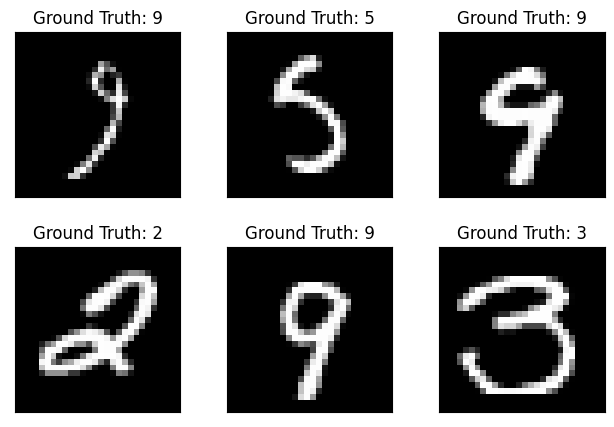

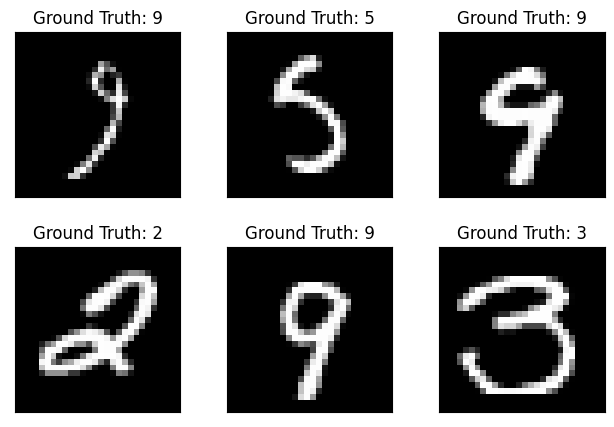

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor

batch_size_train = 128
batch_size_test = 256

data_train = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
size_train = len(data_train)


data_test = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

size_test = len(data_test)

train_loader = torch.utils.data.DataLoader(data_train,
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(data_test,
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
    
fig

In [ ]:
epochs = 50

for epoch in range(epochs):
    lossepoch = 0

    net.train()
    for x_batch,_ in train_loader:
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(x_batch)
        #loss = torch.mean((output - x_batch)**2)
        loss = criterion(output, x_batch)
        loss.backward()
        optimizer.step() 
        lossepoch += loss.detach()

    print(" Train loss : " + str(lossepoch/len(train_loader)))
    lossepoch = 0
    correct = 0
    net.eval()
    for x_batch,y_batch in test_loader:
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(x_batch)
        loss = criterion(output, x_batch)
        lossepoch += loss.detach()

    print(" Test loss : " + str(lossepoch/len(test_loader)))
        
        
        

 Train loss : tensor(0.7833)
 Test loss : tensor(0.6836)


In [ ]:
_,x = next(enumerate(train_loader))
y = x[1]
x = x[0]

x = net.encoder(x).detach().numpy()


In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')

# Add colorbar to show mapping from integer to color
plt.colorbar()

# Show plot
plt.show()